In [1]:
#!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
import numpy as np

In [3]:
iris=load_iris()
x,y=iris.data,iris.target

In [4]:
x,y=shuffle(x,y,random_state=42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [5]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [6]:
model=Sequential()
model.add(Dense(10,input_dim=4,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


C:\Users\Mohammed Arif\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
history=model.fit(x_train,y_train,epochs=100,batch_size=10,validation_data=(x_test,y_test),verbose=1)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9181 - loss: 0.1193 - val_accuracy: 0.9667 - val_loss: 0.0529
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9605 - loss: 0.0695 - val_accuracy: 0.9667 - val_loss: 0.0494
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9296 - loss: 0.1118 - val_accuracy: 0.9667 - val_loss: 0.0538
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9814 - loss: 0.0720 - val_accuracy: 0.9667 - val_loss: 0.0501
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9720 - loss: 0.0784 - val_accuracy: 0.9667 - val_loss: 0.0490
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9687 - loss: 0.0769 - val_accuracy: 0.9667 - val_loss: 0.0505
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9582 - loss: 0.0912 - val_accuracy: 0.9667 - val_loss: 0.0464
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9704 - loss: 0.0587 - val_accuracy: 1.0000 -

In [17]:
loss,accuracy=model.evaluate(x_test,y_test)
print(f'Test Loss:{loss},Test Accuracy:{accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 0.0294
Test Loss:0.02944077178835869,Test Accuracy:1.0


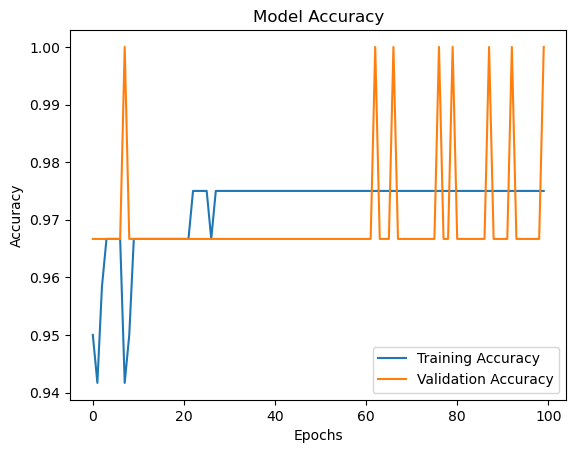

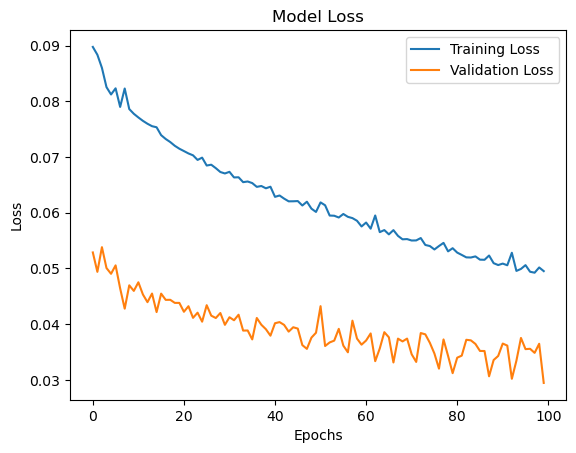

In [19]:
# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
